 # Домашнее задание 1. Линейные модели

### Королев Яков ИУ8-83 

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

In [2]:
data = pd.read_csv('C:\\Users\\korol\\Downloads\\B\\Car details v3.csv')

## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

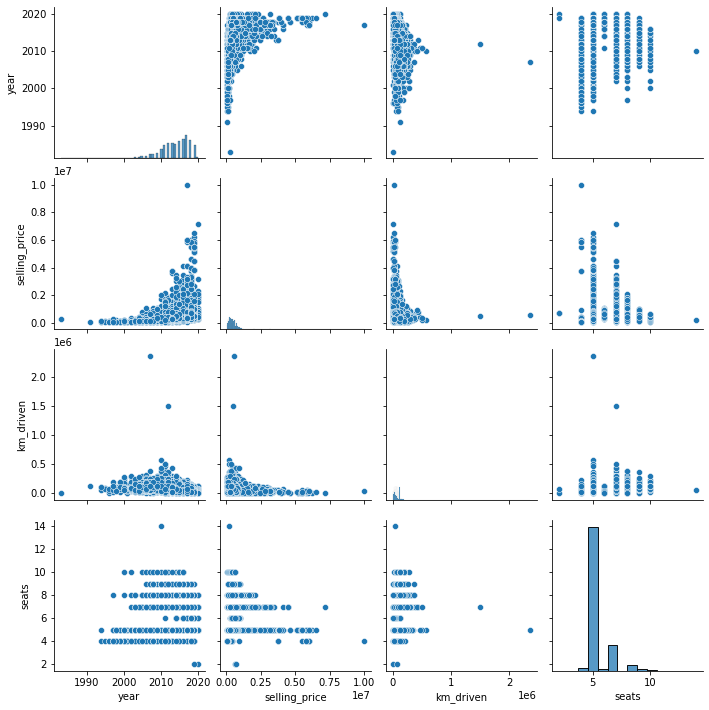

In [3]:
sns.pairplot(data)

## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [4]:
def transformColumn(value):
    values, indexes = pd.factorize(data[value], sort=True)
    return values

data = data.dropna()
data = data.drop(['name'],axis=1)
data['fuel'] = transformColumn('fuel')
data['seller_type'] = transformColumn('seller_type')
data['transmission'] = transformColumn('transmission')
data['owner'] = transformColumn('owner')
data['torque'] = transformColumn('torque')

data['mileage'] = pd.to_numeric(data['mileage'].str.extract(r"\b(\d+)\b")[0], errors="coerce")
data['engine'] = pd.to_numeric(data['engine'].str.extract(r"\b(\d+)\b")[0], errors="coerce")
data['max_power'] = pd.to_numeric(data['max_power'].str.extract(r"\b(\d+)\b")[0], errors="coerce")

data = pd.get_dummies(data)
X = data.drop(['selling_price'],axis=1)
Y = data['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля(взято больше 81 квантиля)) на оценку ошибки.



In [5]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, Y_train)
pred = ols_reg.predict(X_test)

ols_reg = LinearRegression()
ols_reg.fit(X_train, Y_train)
pred = ols_reg.predict(X_test)

mn = mean_squared_error(Y_test, pred, squared=False)
print('Error:', mn)
print('Quality control <= Baseline: ', mn <= 110000)

Error: 457200.4981903021
Quality control <= Baseline:  False


In [6]:
quant = np.quantile(Y, 0.81)
print('quantile 81: ', quant)
data_no_emissions = data[data['selling_price'] <= quant]

quantile 81:  754050.0000000002


In [7]:
X2 = data_no_emissions.drop(['selling_price'],axis=1) 
Y2 = data_no_emissions['selling_price']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=.20, random_state=0)

In [8]:
ols_reg2 = LinearRegression()
ols_reg2.fit(X_train2, Y_train2)
pred2 = ols_reg2.predict(X_test2)

mn = mean_squared_error(Y_test2, pred2, squared=False)
print('Error:', mn)
print('Quality control <= Baseline: ', mn <= 110000)

Error: 107534.79244169111
Quality control <= Baseline:  True


## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [9]:
ridge_reg = Ridge()
ridge_reg.fit(X_train2, Y_train2)
pred = ridge_reg.predict(X_test2)

mn = mean_squared_error(Y_test2, pred, squared=False)
print('Error:', mn)
print('Quality control <= Baseline: ', mn <= 110000)

Error: 107536.98052172005
Quality control <= Baseline:  True


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [10]:
lasso_reg = Lasso()
lasso_reg.fit(X_train2, Y_train2)
pred = lasso_reg.predict(X_test2)

mn = mean_squared_error(Y_test2, pred, squared=False)
print('Error:', mn)
print('Quality control <= Baseline: ', mn <= 110000)

Error: 107535.1859935071
Quality control <= Baseline:  True


## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

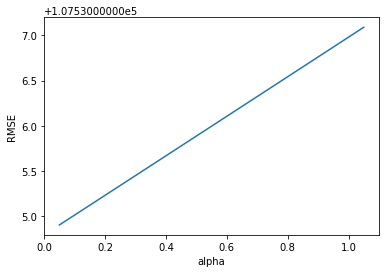

In [11]:
RMSE = []
for alpha in np.linspace(0.05,1.05,21):
  ridge_reg = Ridge(alpha=alpha)
  ridge_reg.fit(X_train2, Y_train2)
  pred = ridge_reg.predict(X_test2)
  RMSE.append(mean_squared_error(Y_test2, pred, squared=False))

plt.plot(np.linspace(0.05,1.05,21), RMSE)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ: 
Модель, показавшая лучший результат: OLS regression с RMSE = 107534.79244169111

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

In [12]:
data = pd.read_csv('C:\\Users\\korol\\Downloads\\L\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

## 2.2 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

In [13]:
def transformColumn(value):
    values, indexes = pd.factorize(data[value], sort=True)
    return values


data = data.dropna()


data['Attrition'] = transformColumn('Attrition')
data['BusinessTravel'] = transformColumn('BusinessTravel')
data['Department'] = transformColumn('Department')
data['EducationField'] = transformColumn('EducationField')
data['Gender'] = transformColumn('Gender')
data['JobRole'] = transformColumn('JobRole')
data['MaritalStatus'] = transformColumn('MaritalStatus')
data['Over18'] = transformColumn('Over18')
data['OverTime'] = transformColumn('OverTime')

X = data.drop(['Attrition'],axis=1)
Y = data['Attrition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

## 2.3 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [14]:
stScaler = StandardScaler() 
stTrain = stScaler.fit_transform(X_train) 
stTest = stScaler.transform(X_test) 

pca = PCA(n_components=0.95) 
pcaTrain = pca.fit_transform(stTrain)
pcaTest = pca.transform(stTest)

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

In [15]:
logistic_reg =LogisticRegression()
logistic_reg.fit(pcaTrain, Y_train)
pred = logistic_reg.predict(pcaTest)

table = classification_report(pred, Y_test) 
print(table)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       271
           1       0.37      0.78      0.50        23

    accuracy                           0.88       294
   macro avg       0.67      0.83      0.72       294
weighted avg       0.93      0.88      0.90       294



In [16]:
f1 = f1_score(pred, Y_test, average='macro') 
print('f1 score: ', f1)

f1 score:  0.7151162790697674


## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

In [17]:
grid_search=GridSearchCV(LogisticRegression(),{'C':np.arange(0.01,1.01,0.1)},return_train_score=True).fit(pcaTrain,Y_train)
grid_search.best_params_,grid_search.best_score_

({'C': 0.11}, 0.8639523981247746)

## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

In [18]:
table = classification_report(pred, Y_test) 
print(table)
f1 = f1_score(pred, Y_test, average='macro') 
print('f1 score: ', f1,'\n')
pred2=grid_search.predict(pcaTest)
table = classification_report(pred2, Y_test) 
print(table)
f1 = f1_score(pred2, Y_test, average='macro') 
print('f1 score: ', f1)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       271
           1       0.37      0.78      0.50        23

    accuracy                           0.88       294
   macro avg       0.67      0.83      0.72       294
weighted avg       0.93      0.88      0.90       294

f1 score:  0.7151162790697674 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       272
           1       0.35      0.77      0.48        22

    accuracy                           0.87       294
   macro avg       0.66      0.83      0.70       294
weighted avg       0.93      0.87      0.89       294

f1 score:  0.7036532541477103


Ваш ответ: 
Как видно из вывода, Модель 1 показала более лучший результат.

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди numpy.geomspace(0.0001, 1, num=13). Постройте график функции ошибки для epsilon [0.0001, 0.001, 0.01, 0.1, 1].

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

Ваш вывод (2-3 предложения):

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

Ваш вывод (2-3 предложения):